# Project: Diamond Price Regretion Problem

## 1. Description

Context
This classic dataset contains the prices and other attributes of almost 54,000 diamonds. It's a great dataset for beginners learning to work with data analysis and visualization.

Content
price price in US dollars (\$326--\$18,823)

carat weight of the diamond (0.2--5.01)

cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color diamond colour, from J (worst) to D (best)

clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x length in mm (0--10.74)

y width in mm (0--58.9)

z depth in mm (0--31.8)

depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

table width of top of diamond relative to widest point (43--95)

## 2. Bookstores

In [3]:
import sklearn
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path


In [4]:
print('NumPy', np.__version__)
print('Pandas', pd.__version__)
print('Matplotlib', mpl.__version__)
print('Scikit-learn', sklearn.__version__)
print('Seaborn', sns.__version__)

NumPy 1.26.4
Pandas 2.1.4
Matplotlib 3.8.0
Scikit-learn 1.2.2
Seaborn 0.12.2


## 3. DataSet

### 3.1. Dataset load

https://www.kaggle.com/datasets/shivam2503/diamonds/data

In [5]:
os.listdir("data/")

['data.csv']

In [6]:
data_file = Path.cwd().resolve()/"Data"/"data.csv"
df_raw = pd.read_csv(data_file)
df_raw.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### 3.2. Descritaset

In [7]:
##  Size
df_raw.shape

(53940, 11)

In [8]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [9]:
df_processed = df_raw

change the name of the target variable

In [10]:
df_processed = df_processed.rename(columns={"price":"target"})
df_processed.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,target,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## 4. Data cleaning

### 4.1. Null handling

In [11]:
df_processed.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
target        0
x             0
y             0
z             0
dtype: int64

### 4.2. Remove Nulls

In [12]:
df_processed.dropna(inplace=True)

### 4.3. Delete Data

#### Delete unnecessary columns

In [13]:
df_processed.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'target', 'x', 'y', 'z'],
      dtype='object')

In [14]:
df_processed.drop("Unnamed: 0", axis=1, inplace=True)
df_processed.head(5)

,carat,cut,color,clarity,depth,table,target,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## 5. Exploratory data analysis

### 5.1. Data Analysis

Descriptive statistics variable numerical

In [15]:
print(df_processed.describe())

              carat         depth         table        target             x  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940     61.749405     57.457184   3932.799722      5.731157   
std        0.474011      1.432621      2.234491   3989.439738      1.121761   
min        0.200000     43.000000     43.000000    326.000000      0.000000   
25%        0.400000     61.000000     56.000000    950.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5324.250000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  
count  53940.000000  53940.000000  
mean       5.734526      3.538734  
std        1.142135      0.705699  
min        0.000000      0.000000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540000      4.040000  


Descriptive statistics variable object

In [16]:
print(df_processed.describe(include="object"),'\n')

          cut  color clarity
count   53940  53940   53940
unique      5      7       8
top     Ideal      G     SI1
freq    21551  11292   13065 



Group by Target

In [17]:
print(df_processed.groupby('target').size())

target
326      2
327      1
334      1
335      1
336      2
        ..
18803    1
18804    1
18806    1
18818    1
18823    1
Length: 11602, dtype: int64


### 5.2. Graphics

#### 5.2.1. Grafico de Correlación

c:\Users\dpare\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\dpare\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\dpare\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\dpare\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

<Figure size 500x500 with 0 Axes>

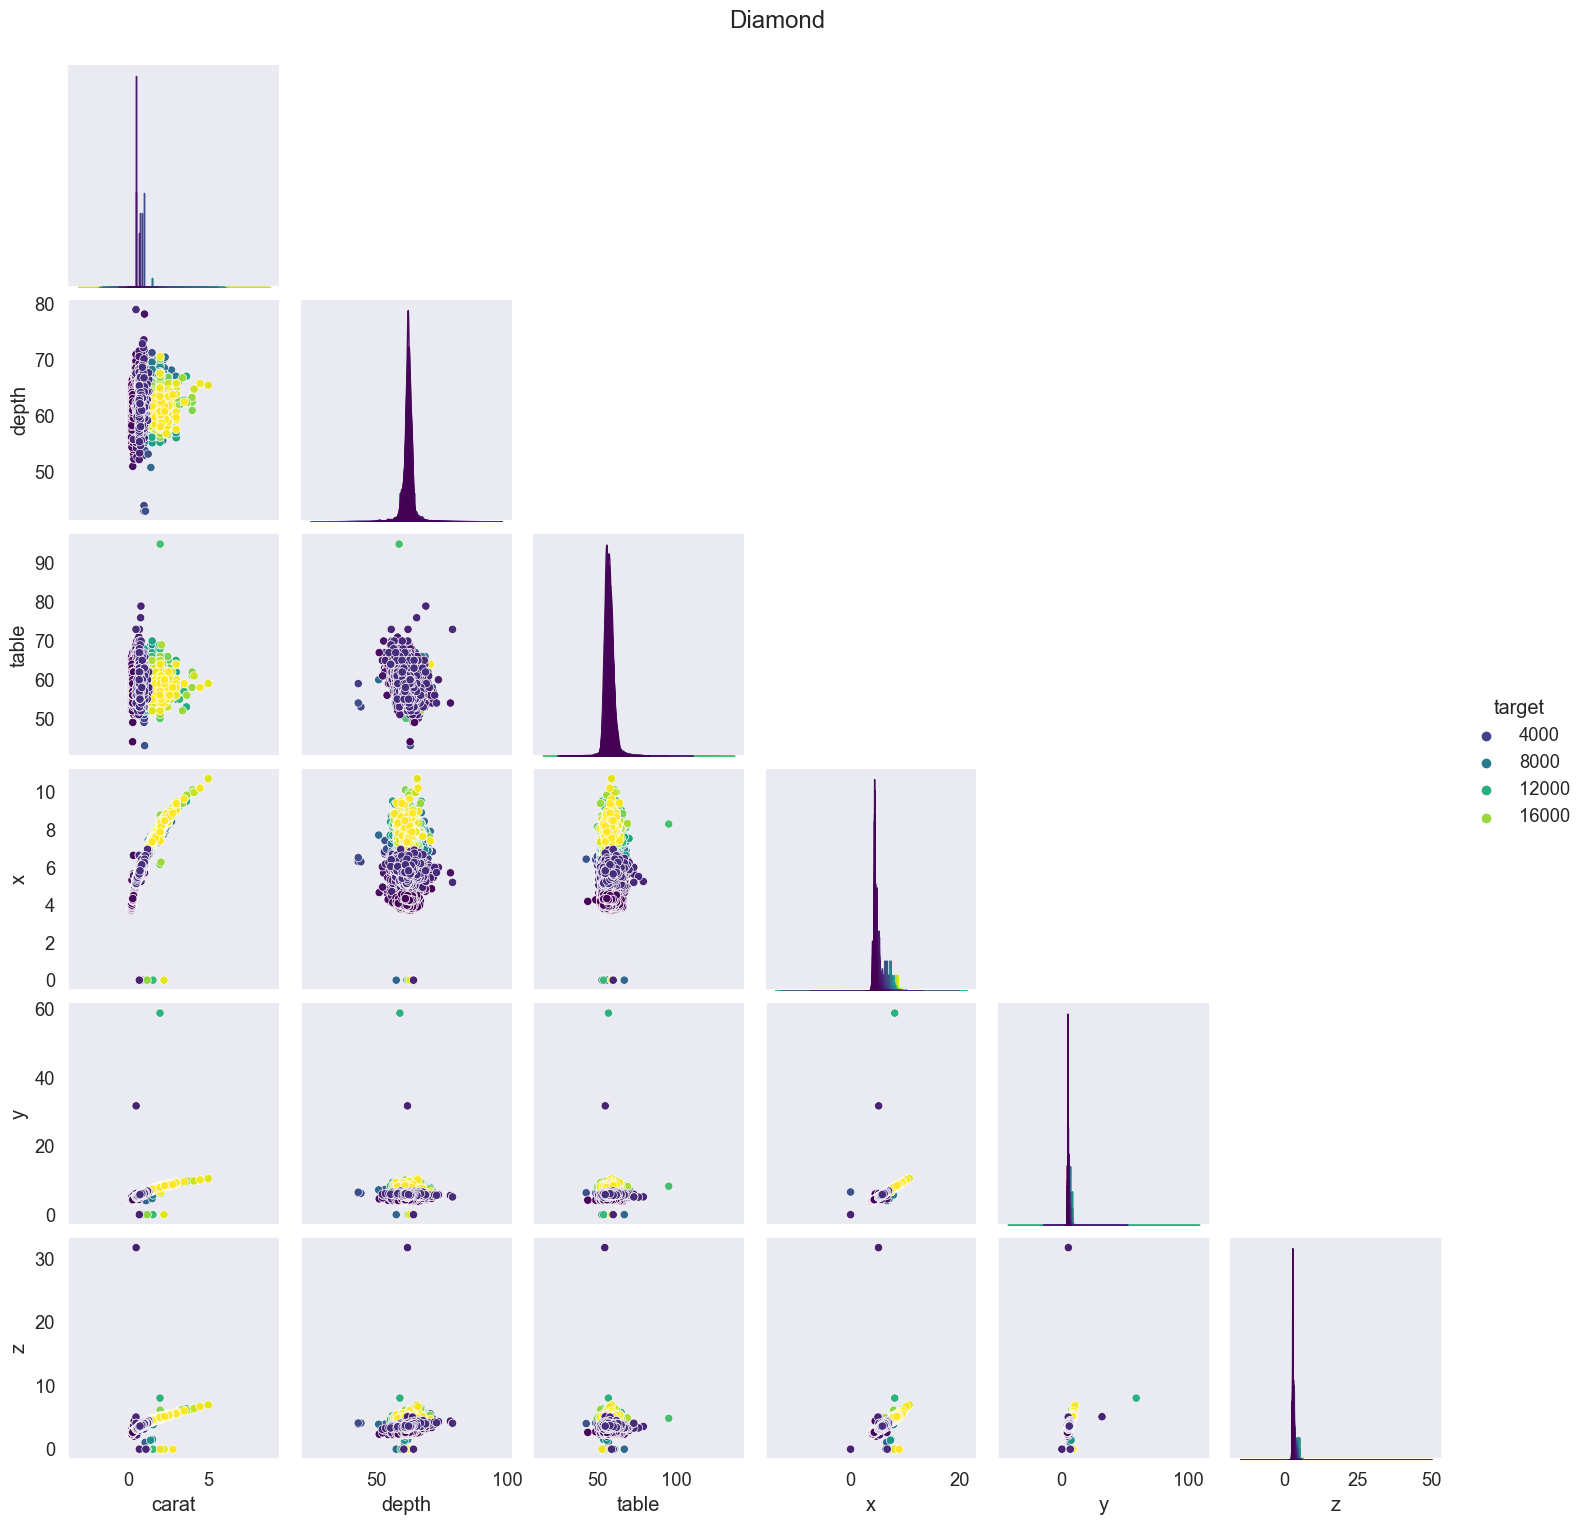

In [18]:
fig0 = plt.figure(figsize=(5,5))
sns.set(style="dark", font_scale=1.2)
fig = sns.pairplot(data=df_processed, hue='target', palette='viridis', corner=True)
fig.fig.suptitle('Diamond', y=1.02)
plt.show()

In [19]:
correlations=df_processed.select_dtypes("number").corrwith(df_processed["target"], method="pearson").sort_values(ascending=False)
print(correlations)

target    1.000000
carat     0.921591
x         0.884435
y         0.865421
z         0.861249
table     0.127134
depth    -0.010647
dtype: float64


In [20]:
correlations=df_processed.select_dtypes("number").corrwith(df_processed["target"], method="spearman").sort_values(ascending=False)
print(correlations)

target    1.000000
x         0.963196
carat     0.962883
y         0.962719
z         0.957232
table     0.171784
depth     0.010020
dtype: float64


In [21]:
df_processed.select_dtypes("number").corr()

,carat,depth,table,target,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
target,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


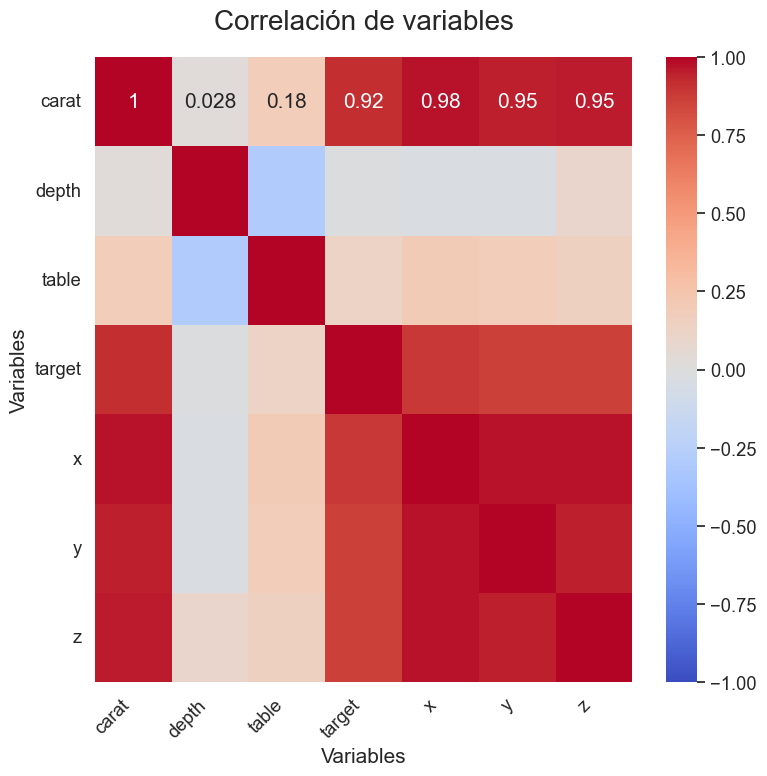

In [22]:
plt.figure(figsize=(8, 8))
sns.heatmap(
    df_processed.select_dtypes("number").corr(),
    annot=True,
    cmap='coolwarm',
    vmin=-1, vmax=1,  # Limitar el rango de valores del mapa de colores
    annot_kws={"size": 15},  # Ajustar el tamaño de las anotaciones
    linewidths=0.0,  # Añadir líneas divisorias entre las celdas
    linecolor='gray'
)
plt.title('Correlación de variables', fontsize=20, pad=20)
plt.xlabel('Variables', fontsize=15)
plt.ylabel('Variables', fontsize=15)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

#### 5.2.2. Grafico de Distribución

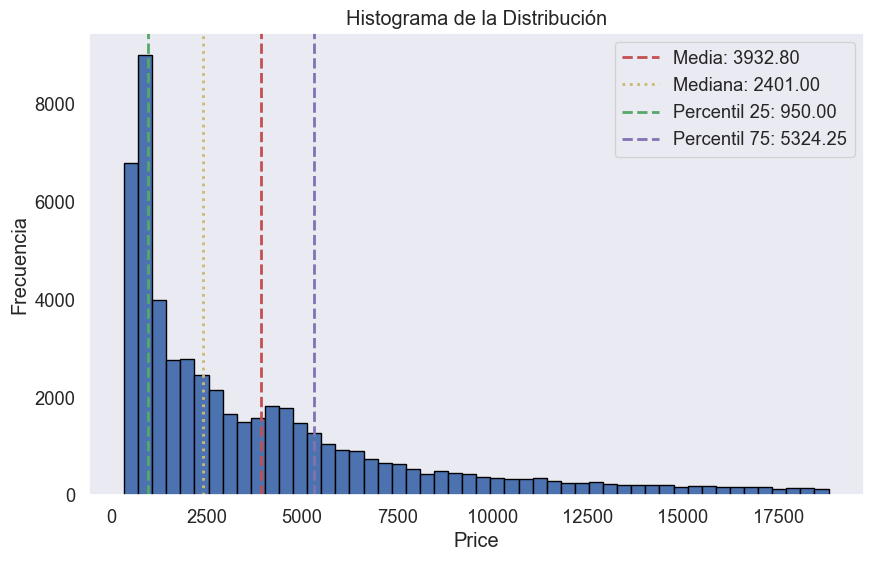

In [23]:
mean_value = df_processed["target"].mean()
median_value = df_processed["target"].median()
percentile_25 = np.percentile(df_processed["target"].dropna(), 25)
percentile_75 = np.percentile(df_processed["target"].dropna(), 75)

fig1=plt.figure(figsize=(10, 6))
plt.hist(df_processed["target"], bins=50, edgecolor='black')
plt.axvline(mean_value, color='r', linestyle='dashed', linewidth=2, label=f'Media: {mean_value:.2f}')
plt.axvline(median_value, color='y', linestyle='dotted', linewidth=2, label=f'Mediana: {median_value:.2f}')
plt.axvline(percentile_25, color='g', linestyle='dashed', linewidth=2, label=f'Percentil 25: {percentile_25:.2f}')
plt.axvline(percentile_75, color='m', linestyle='dashed', linewidth=2, label=f'Percentil 75: {percentile_75:.2f}')
plt.xlabel('Price')
plt.ylabel('Frecuencia')
plt.title('Histograma de la Distribución')
plt.legend()
plt.show()

#### 5.2.3. Grafico de Bigotes de target

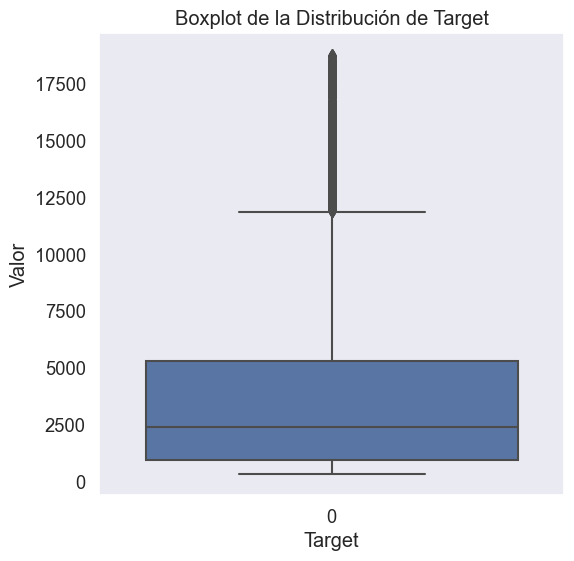

In [24]:
plt.figure(figsize=(6, 6))
sns.boxplot(data=df_processed["target"])
plt.xlabel('Target')
plt.ylabel('Valor')
plt.title('Boxplot de la Distribución de Target')
plt.show()


#### 5.2.4. Grafico de Bigotes de target por categoria

In [25]:
print(df_processed.describe(include="object"),'\n')

          cut  color clarity
count   53940  53940   53940
unique      5      7       8
top     Ideal      G     SI1
freq    21551  11292   13065 



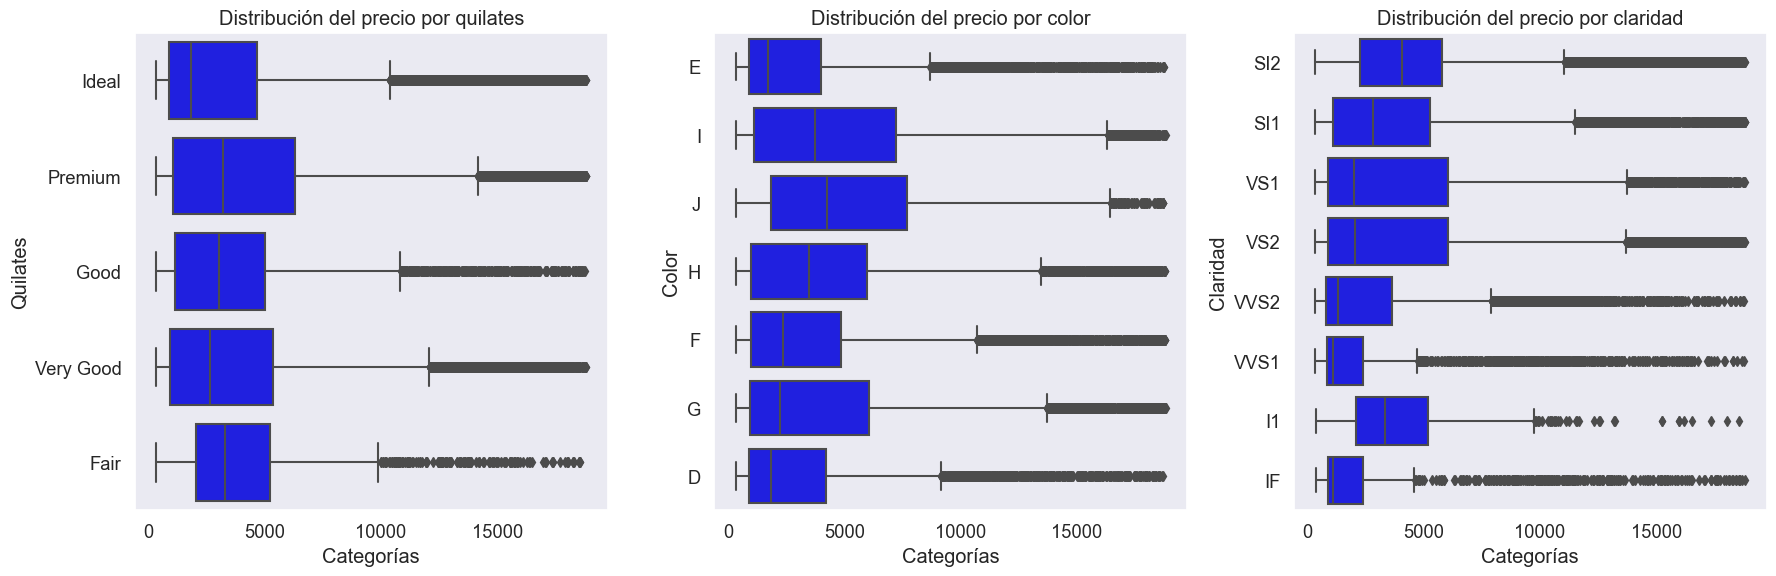

In [26]:
fig2=fig, axes = plt.subplots(1, 3, figsize=(18, 6))
# Gráfico 1: Boxplot
sns.boxplot(data=df_processed, x='target', y='cut', color='blue', ax=axes[0])
axes[0].set_title('Distribución del precio por quilates')
axes[0].set_xlabel('Categorías')
axes[0].set_ylabel('Quilates')
# Gráfico 2: Boxplot
sns.boxplot(data=df_processed, x='target', y='color', color='blue', ax=axes[1])
axes[1].set_title('Distribución del precio por color')
axes[1].set_xlabel('Categorías')
axes[1].set_ylabel('Color')
# Gráfico 3: Boxplot
sns.boxplot(data=df_processed, x='target', y='clarity', color='blue', ax=axes[2])
axes[2].set_title('Distribución del precio por claridad')
axes[2].set_xlabel('Categorías')
axes[2].set_ylabel('Claridad')
# Ajustar el diseño para que no se solapen las etiquetas
fig.tight_layout()
# Mostrar la figura con múltiples subplots
plt.show()


<Figure size 600x600 with 0 Axes>

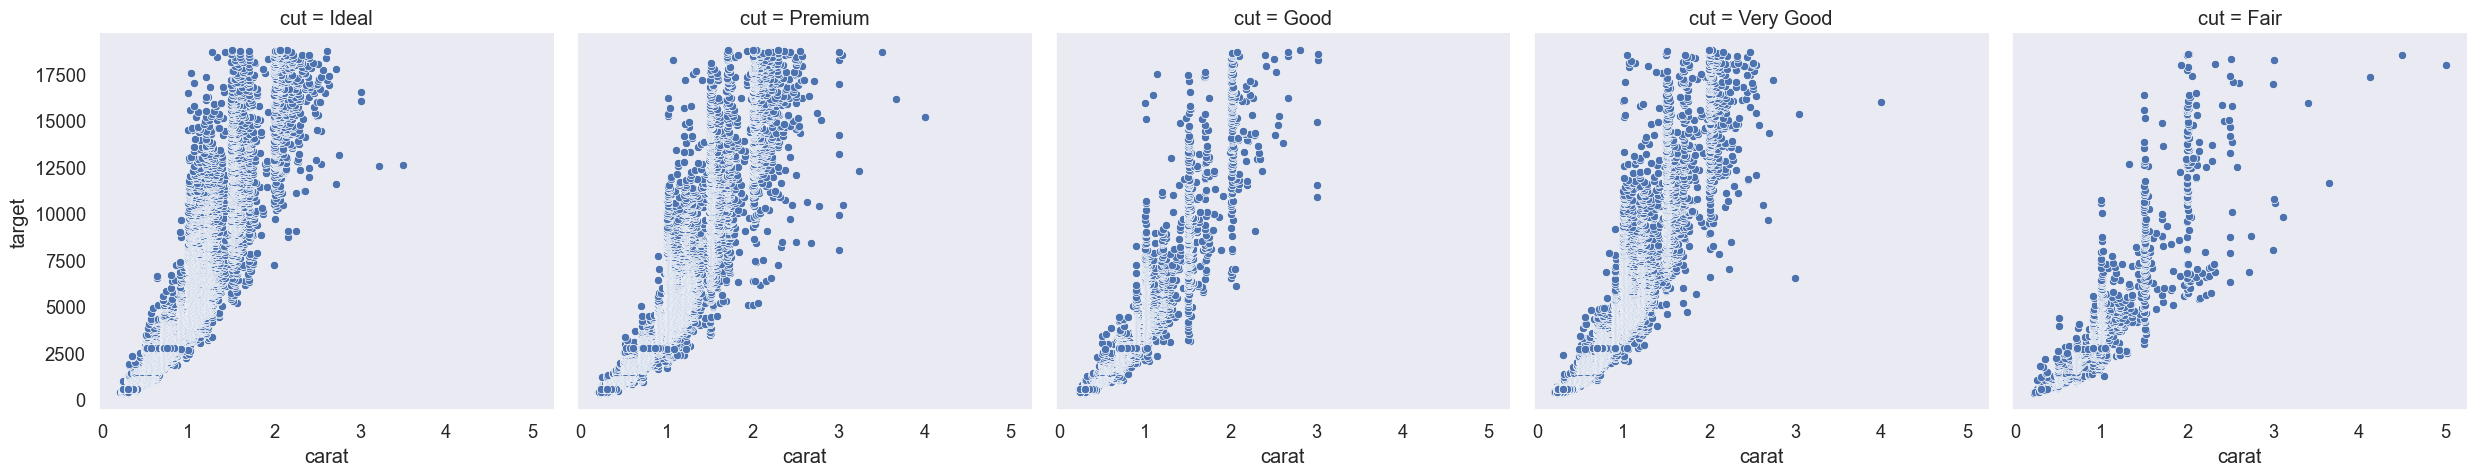

In [27]:
plt.figure(figsize=(6, 6))
sns.relplot(data=df_processed, x="carat", y="target", col="cut", col_wrap=5)

<Figure size 600x600 with 0 Axes>

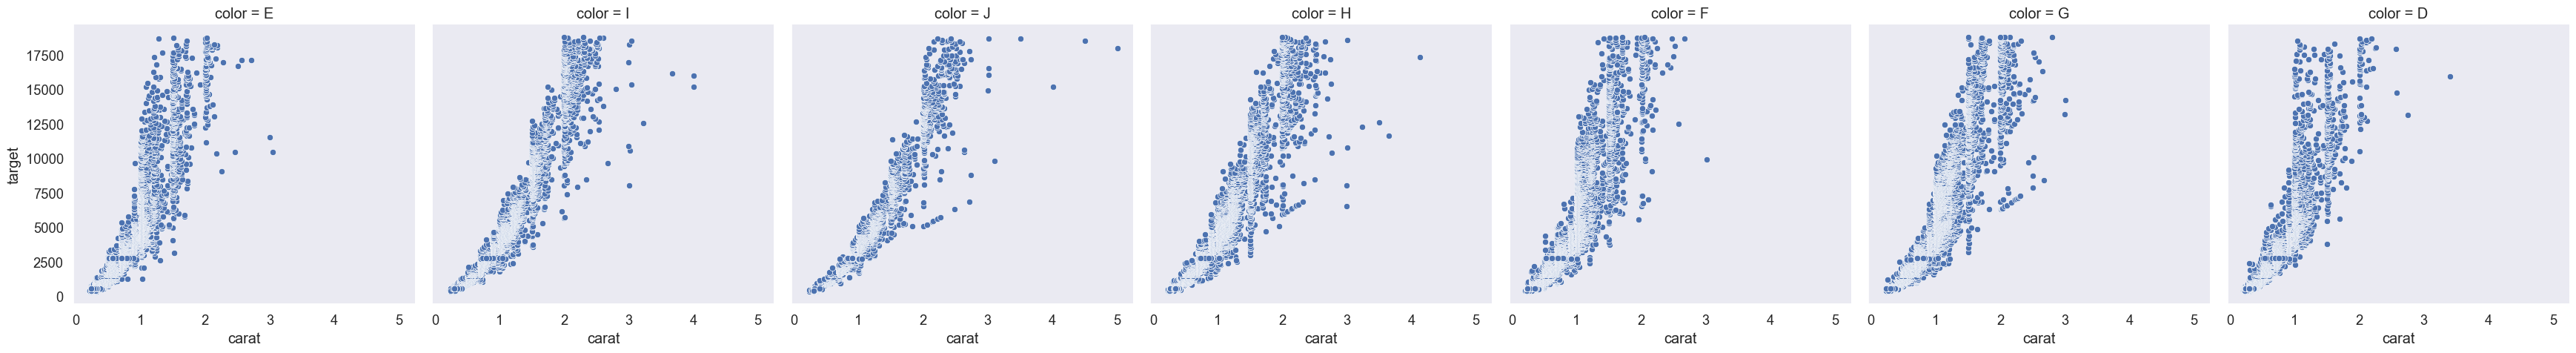

In [28]:
plt.figure(figsize=(6, 6))
sns.relplot(data=df_processed, x="carat", y="target", col="color", col_wrap=7)

<Figure size 600x600 with 0 Axes>

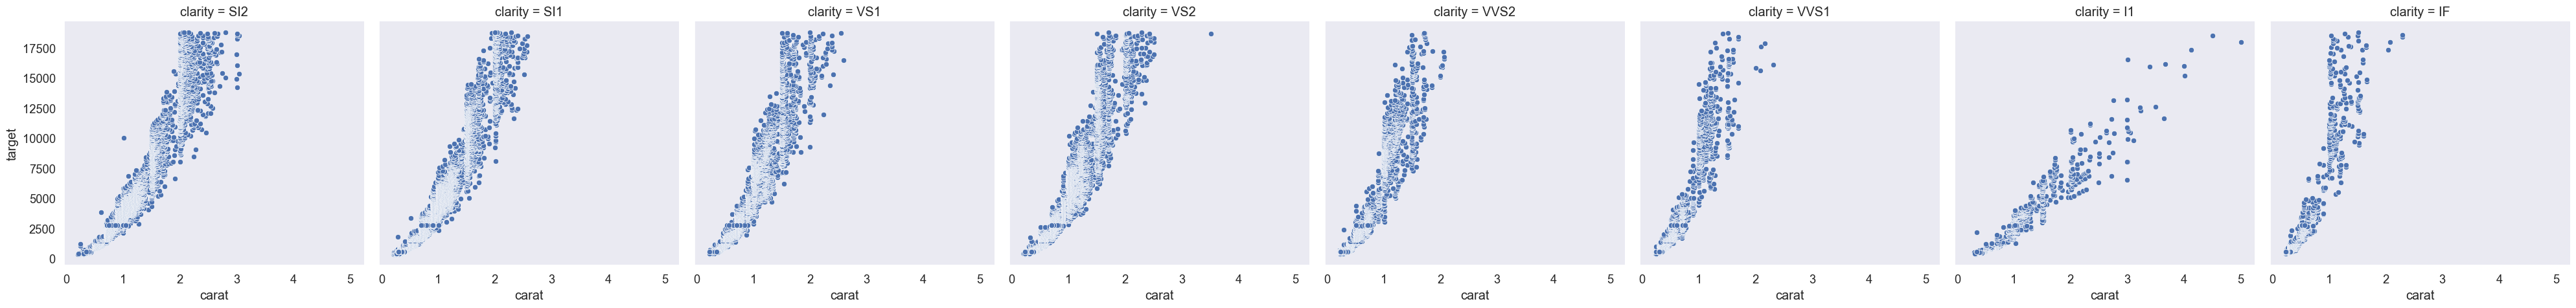

In [29]:
plt.figure(figsize=(6, 6))
sns.relplot(data=df_processed, x="carat", y="target", col="clarity", col_wrap=8)

#### 5.2.1. Grafico de Distribución de target por variable numerica de alta corrección

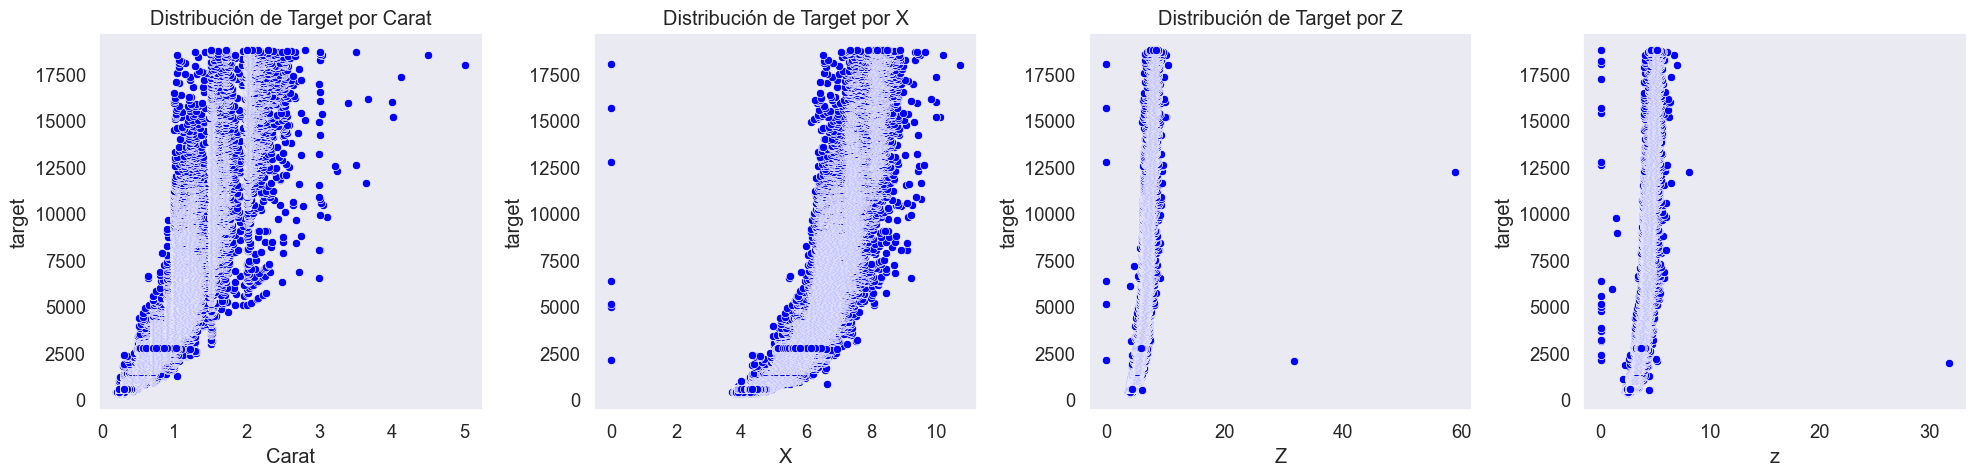

In [30]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
# Gráfico 1: Scatterplot
sns.scatterplot(data=df_processed, x="carat", y="target", ax=axes[0], color="blue")
axes[0].set_title('Distribución de Target por Carat')
axes[0].set_xlabel('Carat')
axes[0].set_ylabel('target')
# Gráfico 2: Scatterplot
sns.scatterplot(data=df_processed, x="x", y="target", ax=axes[1], color="blue")
axes[1].set_title('Distribución de Target por X')
axes[1].set_xlabel('X')
axes[1].set_ylabel('target')
# Gráfico 3: Scatterplot
sns.scatterplot(data=df_processed, x="y", y="target", ax=axes[2], color="blue")
axes[2].set_title('Distribución de Target por Y')
axes[2].set_xlabel('Y')
axes[2].set_ylabel('target')
# Gráfico 4: Scatterplot
sns.scatterplot(data=df_processed, x="z", y="target", ax=axes[3], color="blue")
axes[2].set_title('Distribución de Target por Z')
axes[2].set_xlabel('Z')
axes[2].set_ylabel('target')
plt.tight_layout()
plt.show()

c:\Users\dpare\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\dpare\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


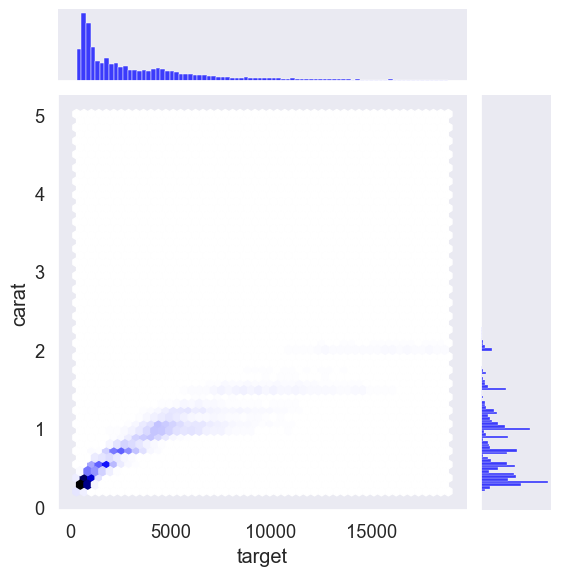

In [31]:
sns.jointplot(data=df_processed, x="target", y="carat", kind="hex", color="blue")

## 6. Tranformación  de variables

In [32]:
df_processed = pd.get_dummies(df_processed.iloc[:,0:7])
df_processed

,carat,depth,table,target,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,0.21,59.8,61.0,326,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
2,0.23,56.9,65.0,327,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,0.29,62.4,58.0,334,False,False,False,True,False,False,...,True,False,False,False,False,False,False,True,False,False
4,0.31,63.3,58.0,335,False,True,False,False,False,False,...,False,True,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,False,False,True,False,False,True,...,False,False,False,False,True,False,False,False,False,False
53936,0.72,63.1,55.0,2757,False,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
53937,0.70,62.8,60.0,2757,False,False,False,False,True,True,...,False,False,False,False,True,False,False,False,False,False
53938,0.86,61.0,58.0,2757,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False


In [33]:
correlations=df_processed.corrwith(df_processed["target"], method="spearman").sort_values(ascending=False)
print(correlations)

target           1.000000
carat            0.962883
table            0.171784
clarity_SI2      0.167910
cut_Premium      0.094623
color_J          0.082914
color_I          0.073737
cut_Fair         0.054646
color_H          0.054007
clarity_SI1      0.035320
clarity_I1       0.030028
cut_Good         0.017646
depth            0.010020
cut_Very Good    0.004499
color_G          0.002484
color_F         -0.009842
clarity_VS2     -0.013144
clarity_VS1     -0.026240
color_D         -0.062506
clarity_IF      -0.067239
clarity_VVS2    -0.082766
color_E         -0.094993
cut_Ideal       -0.117449
clarity_VVS1    -0.121999
dtype: float64


## 6. Modeling

### 6.1. Partitioning the dataset into test and training

In [34]:
X = df_processed.drop(columns = ['target'])
y = df_processed['target']

print('Dimensiones de X: {}'.format(X.shape))
print('Dimensiones de y: {}'.format(y.shape))

Dimensiones de X: (53940, 23)
Dimensiones de y: (53940,)


In [35]:
X.head()

,carat,depth,table,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,False,False,True,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False
1,0.21,59.8,61.0,False,False,False,True,False,False,True,...,False,False,False,False,True,False,False,False,False,False
2,0.23,56.9,65.0,False,True,False,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
3,0.29,62.4,58.0,False,False,False,True,False,False,False,...,True,False,False,False,False,False,False,True,False,False
4,0.31,63.3,58.0,False,True,False,False,False,False,False,...,False,True,False,False,False,True,False,False,False,False


In [36]:
y.head()

0    326
1    326
2    327
3    334
4    335
Name: target, dtype: int64

### 6.2. Data separation

In [39]:
X_train, X_test, y_train, y_test = train_test_split(
    X,y,
    test_size = 0.3,
    random_state =4,
)

In [40]:
print('Dimensiones de X de entrenamiento: {}'.format(X_train.shape))
print('Dimensiones de y de entrenamiento: {}\n'.format(y_train.shape))

print('Dimensiones de X de prueba: {}'.format(X_test.shape))
print('Dimensiones de y de prueba: {}'.format(y_test.shape))

Dimensiones de X de entrenamiento: (37758, 23)
Dimensiones de y de entrenamiento: (37758,)

Dimensiones de X de prueba: (16182, 23)
Dimensiones de y de prueba: (16182,)


In [43]:
#category_counts = y_train.value_counts()
#print(category_counts)

In [44]:
#category_counts_df = category_counts.reset_index()
#category_counts_df.columns = ['Category', 'Count']
#fig7=plt.figure(figsize=(5, 5))
#sns.barplot(x='Category', y='Count', data=category_counts_df, palette='viridis')
#plt.title('Distribución de Categorías en y_train')
#plt.xlabel('Categoría')
#plt.ylabel('Frecuencia')
#plt.show()

#### Scaler data

In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 7. Classification algorithm

### 7.1. KNN K-Neighbors Near

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

#### 7.1.1. Training

In [ ]:
model_KNN = KNeighborsClassifier(n_neighbors=5)
model_KNN.fit(X_train_scaled, y_train)

KNeighborsClassifier()

#### 7.1.2. Model evaluation

In [ ]:
y_predicted = model_KNN.predict(X_test_scaled)
y_predicted

array(['setosa', 'versicolor', 'virginica', 'virginica', 'setosa',
       'virginica', 'virginica', 'versicolor', 'setosa', 'versicolor',
       'virginica', 'setosa', 'setosa', 'versicolor', 'setosa',
       'virginica', 'virginica', 'setosa', 'virginica', 'setosa',
       'virginica', 'virginica', 'versicolor', 'versicolor', 'setosa',
       'virginica', 'setosa', 'setosa', 'virginica', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'virginica', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'virginica', 'virginica',
       'setosa', 'versicolor', 'versicolor', 'versicolor'], dtype=object)

In [ ]:
comparation=y_test==y_predicted
df_verification_KKN = pd.DataFrame({"Real Data":y_test, "Predict Data":y_predicted, "Comparation":comparation})
df_verification_KKN.head()

,Real Data,Predict Data,Comparation
23,setosa,setosa,True
59,versicolor,versicolor,True
138,virginica,virginica,True
68,versicolor,virginica,False
36,setosa,setosa,True


#### 7.1.3. Accuracy

In [ ]:
from  sklearn.metrics import accuracy_score
acc_KNN = accuracy_score(y_test, y_predicted)
print("The accuracy of the model on test data is " + str(round(acc_KNN * 100, 1)) + "%")
y_predicted_2 = model_KNN.predict(X_train_scaled)
acc_KNN_2 = accuracy_score(y_train, y_predicted_2)
print("The accuracy of the model on train data is " + str(round(acc_KNN_2 * 100, 1)) + "%")


The accuracy of the model on test data is 93.3%
The accuracy of the model on train data is 97.1%


### 7.2. Decisions Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score

#### 7.2.1. Look of Deep

In [ ]:
# Definir el rango de profundidades del árbol de decisión
depth_range = range(1, 10)
acc_test = []
acc_train = []

# Iterar sobre el rango de profundidades
for depth in depth_range:
    # Inicializar el clasificador con la profundidad actual
    model = DecisionTreeClassifier(random_state=0, max_depth=depth)
    model.fit(X_train, y_train)  # Entrenar el modelo

    # Predecir y calcular precisión para el conjunto de prueba y entrenamiento
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)

    # Calcular la métrica de precisión
    acc_test.append(accuracy_score(y_test, y_pred_test))
    acc_train.append(accuracy_score(y_train, y_pred_train))

# Imprimir los resultados
print("Depths:", list(depth_range))
print("Test Accuracy:", acc_test)
print("Train Accuracy:", acc_train)


Depths: [1, 2, 3, 4, 5, 6, 7, 8, 9]
Test Accuracy: [0.6666666666666666, 0.9555555555555556, 0.9777777777777777, 0.9555555555555556, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777]
Train Accuracy: [0.6666666666666666, 0.9619047619047619, 0.9809523809523809, 0.9904761904761905, 1.0, 1.0, 1.0, 1.0, 1.0]


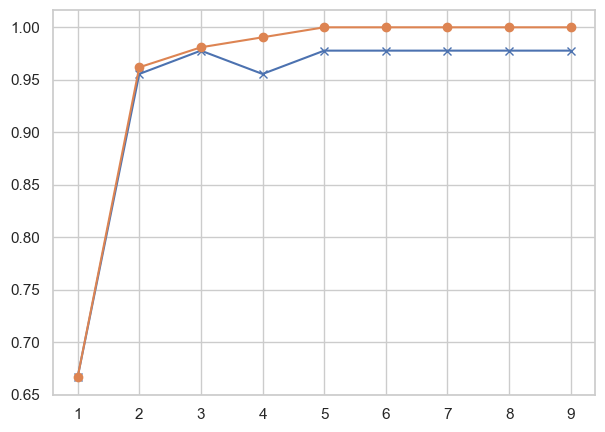

In [ ]:
fig9=plt.figure(figsize=(7, 5))
plt.plot(deep,acc_test,marker="x")
plt.plot(deep,acc_train, marker="o")

#### 7.2.2. Training

In [ ]:
Model_tree = DecisionTreeClassifier(
    max_depth=3,
    random_state=45,
    max_leaf_nodes=3
)
Model_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=3, random_state=45)

#### 7.2.3. Model Evaluation

In [ ]:
y_predicted_tree = Model_tree.predict(X_test)
y_predicted_tree

array(['setosa', 'versicolor', 'virginica', 'versicolor', 'setosa',
       'virginica', 'virginica', 'versicolor', 'setosa', 'versicolor',
       'virginica', 'setosa', 'setosa', 'versicolor', 'setosa',
       'virginica', 'virginica', 'setosa', 'virginica', 'setosa',
       'virginica', 'virginica', 'versicolor', 'versicolor', 'setosa',
       'virginica', 'setosa', 'setosa', 'virginica', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'virginica', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'virginica', 'virginica',
       'setosa', 'versicolor', 'versicolor', 'versicolor'], dtype=object)

In [ ]:
comparation=y_test==y_predicted_tree
df_verification_tree = pd.DataFrame({"Real Data":y_test, "Predict Data":y_predicted_tree, "Comparation":comparation})
df_verification_tree.head()

,Real Data,Predict Data,Comparation
23,setosa,setosa,True
59,versicolor,versicolor,True
138,virginica,virginica,True
68,versicolor,versicolor,True
36,setosa,setosa,True


#### 7.2.4. Accuracy

In [ ]:
acc_Tree = accuracy_score(y_test, y_predicted_tree)
print("The accuracy of the model on test data is " + str(round(acc_Tree * 100, 1)) + "%")
y_Tree_Predic_2 = Model_tree.predict(X_train)
acc_Tree_2 = accuracy_score(y_train, y_Tree_Predic_2)
print("The accuracy of the model on train data is " + str(round(acc_Tree_2 * 100, 1)) + "%")

The accuracy of the model on test data is 95.6%
The accuracy of the model on train data is 96.2%


#### 7.2.5. Feature Importances

In [ ]:
Model_tree.get_depth()

2

In [ ]:
Model_tree.feature_importances_

array([0.        , 0.        , 0.55957837, 0.44042163])

In [ ]:
Model_tree.feature_names_in_

array(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
      dtype=object)

Text(0, 0.5, 'Value feature importances')

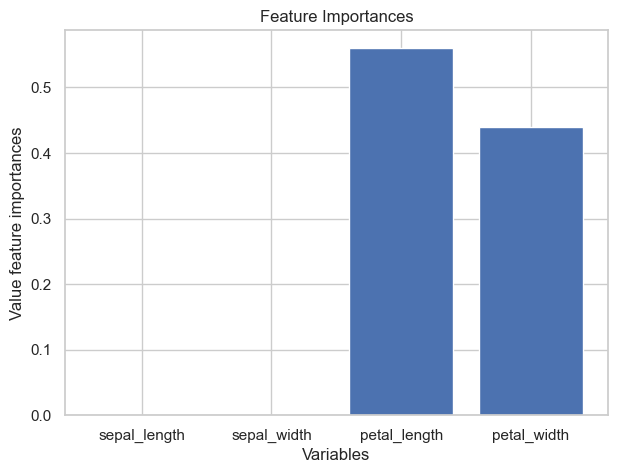

In [ ]:
fig8=plt.figure(figsize=(7, 5))
plt.bar(x=Model_tree.feature_names_in_, height=Model_tree.feature_importances_)
plt.title("Feature Importances")
plt.xlabel('Variables')
plt.ylabel('Value feature importances')

In [ ]:
Model_tree.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [ ]:
from sklearn.tree import export_graphviz

export_graphviz(Model_tree,
                out_file="tree.dot",
                class_names= Model_tree.classes_,
                feature_names= Model_tree.feature_names_in_,
                impurity=False,
                filled=True)

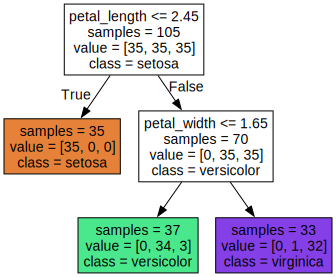

In [ ]:
import graphviz
with open("tree.dot") as f:dot_graph = f.read()
display(graphviz.Source(dot_graph))